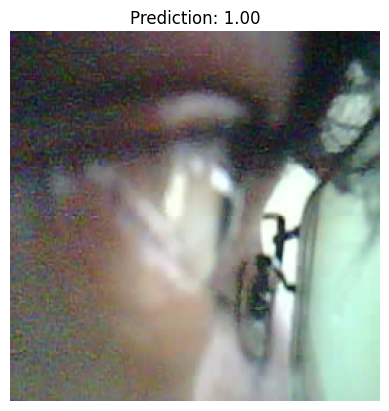

In [3]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

# Define the model (same architecture as the one used during training)
class EyeOpennessModel(torch.nn.Module):
    def __init__(self):
        super(EyeOpennessModel, self).__init__()
        self.conv = torch.nn.Sequential(
            torch.nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(2, 2),
            torch.nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(2, 2),
        )
        self.fc = torch.nn.Sequential(
            torch.nn.Flatten(),
            torch.nn.Linear(32 * 64 * 64, 128),  # Adjust input size based on image dimensions
            torch.nn.ReLU(),
            torch.nn.Linear(128, 1),
            torch.nn.Sigmoid(),
        )

    def forward(self, x):
        x = self.conv(x)
        x = self.fc(x)
        return x

# Function to show the image with prediction
def show_image(image, prediction):
    image = image.permute(1, 2, 0).cpu().numpy()  # Change the order of dimensions
    image = np.clip(image, 0, 1)  # Ensure values are between 0 and 1
    plt.imshow(image)
    plt.title(f"Prediction: {prediction:.2f}")
    plt.axis("off")
    plt.show()

# Load the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = EyeOpennessModel().to(device)
model.load_state_dict(torch.load("eye_openness_model.pth", map_location=device))
model.eval()

# Define the transformation
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])

# Load and preprocess the image
image_path = "/home/r3kste/code/mfw_sleep/full.png"  # Replace with the path to your image
if not os.path.exists(image_path):
    raise FileNotFoundError(f"Image not found at {image_path}")

image = Image.open(image_path).convert("RGB")
input_image = transform(image).unsqueeze(0).to(device)  # Add batch dimension and move to device

# Make prediction
with torch.no_grad():
    prediction = model(input_image).item()

# Show the image with the prediction
show_image(transform(image), prediction)

